###Single node dynamics using the Jansen and Rit model. 

White noise is added to one specific state variable to emulate the external
stochastic stimulus p(t) as described in [JansenRit_1995]

In [2]:
from tvb.simulator.lab import *

####Perform the simulation  

In [3]:
LOG.info("Configuring...")

In [4]:
#Initialise a Model, Coupling, and Connectivity.
jrm = models.JansenRit(mu=0., v0=6.)

white_matter          = connectivity.Connectivity(load_default=True)
white_matter.speed    = numpy.array([100.0])
white_matter_coupling = coupling.SigmoidalJansenRit(a=10.0)

In [5]:
#Initialise an Integrator adding noise to only one state variable
phi_n_scaling = (jrm.a * jrm.A * (jrm.p_max-jrm.p_min) * 0.5 )**2 / 2.
sigma         = numpy.zeros(6) 
sigma[3]      = phi_n_scaling

In [6]:
#Initialise an Integrator adding noise to only one state variable
phi_n_scaling = (jrm.a * jrm.A * (jrm.p_max-jrm.p_min) * 0.5 )**2 / 2.
sigma         = numpy.zeros(6) 
sigma[3]      = phi_n_scaling

In [10]:
#Initialise additive noise for three state variable

hiss    = noise.Additive(nsig=sigma)
heunint = integrators.HeunStochastic(dt=2 ** -4, noise=hiss)

In [11]:
#Initialise some Monitors with period in physical time

momo = monitors.Raw()
mama = monitors.TemporalAverage(period=2 ** -2)
#Bundle them
what_to_watch = list((momo, mama))

In [12]:
#Initialise Simulator -- Model, Connectivity, Integrator, Monitors, and stimulus.
sim = simulator.Simulator(model=jrm,
                          connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint,
                          monitors=what_to_watch)
sim.configure()

In [13]:
LOG.info("Starting simulation...")
#Perform the simulation
raw_data = []
raw_time = []
tavg_time = []
tavg_data = []

for raw, tavg in sim(simulation_length=2 ** 10):
    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])
    
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])

LOG.info("Finished simulation.")

####Plot pretty pictures of what we just did

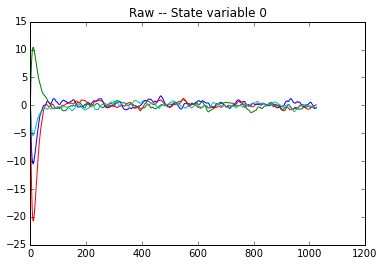

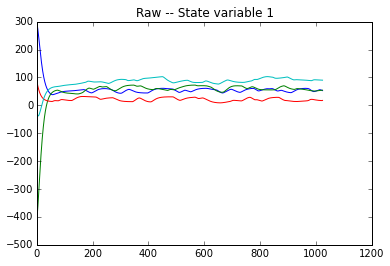

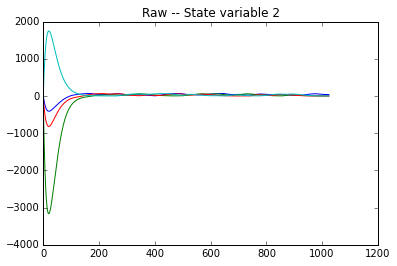

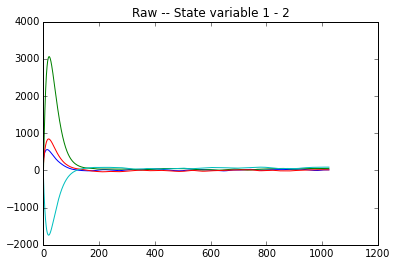

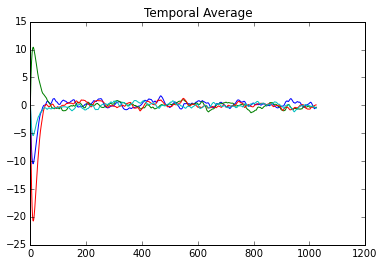

In [14]:
#Make the lists numpy.arrays for easier use.
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)

#Plot raw time series
figure(1)
plot(raw_time, RAW[:, 0, 0:4, 0])
title("Raw -- State variable 0")

figure(2)
plot(raw_time, RAW[:, 1, 0:4, 0])
title("Raw -- State variable 1")

figure(3)
plot(raw_time, RAW[:, 2, 0:4, 0])
title("Raw -- State variable 2")

figure(4)
plot(raw_time, RAW[:, 1, 0:4, 0] - RAW[:, 2, 0:4, 0])
title("Raw -- State variable 1 - 2")


figure(5)
plot(tavg_time, TAVG[:, 0, 0:4, 0])
title("Temporal Average")

#Show them
show()
